# <p style="text-align: justify;"><div class="alert alert-info" role="alert">Multiple Linear Regression with physical predictors without Sumat predictor using Best Subset Selection</div></p>

## `Ana González Guerra` 

### ` Student of the master in Data Science at the University of Cantabria` 

## Index<a class="anchor" id="index"></a>
* [Loading data](#1)
    * [Physical predictors](#2)
    * [Target variables](#3)
* [Train/test partition](#4)
* [Multiple Linear Regression with Best Subset Selection](#5)
    * [Cross validation](#6)
* [References](#ref)
   

## Loading data <a class="anchor" id ="1" ></a>

* [Returning to the index of contents](#index)

### Physical predictors <a class="anchor" id="2"></a>

* [Returning to the index of contents](#index)

In [1]:
handle_physical <- read.csv('handle_physical_transformed_for_multiple_linear_regression.csv')
head(handle_physical)

W1Fc,W1Ox,W1Lac,W1tFc,W1tOx,W1tLac,W1tBorg,W1t5Fc,W1t5Ox,W1t5Lac,...,PlieguePec,PliegueAx,PliegueTri,PliegueSub,PliegueAbd,PliegueSup,tpcgrasa1,tpcgrasa2,PerCue,PerCin
0.09690101,-0.3612723,-0.2759823,-1.45702474,0.54870046,-1.5817296,-1.2280957,-3.38052307,-0.7215023,-2.7847814,...,-0.8757439,-0.8951047,1.0159821,-1.0183111,-1.2665456,-1.0811267,0.37659536,0.02830971,-2.2056212,-1.727334
-1.03822515,-0.6698591,1.5789808,-0.61695891,-1.07606258,0.2939295,-1.2280957,-2.55958657,0.2886009,-2.1390350,...,-1.0373448,-1.0624242,-0.8734794,-1.2829706,-1.3202312,-1.1361661,-0.43175736,0.03866565,-0.8281578,-1.462643
1.32283727,0.5644880,-1.0179676,-0.01024471,0.79866401,-1.1128148,0.8699011,0.01268113,0.2886009,-1.0493379,...,-1.1038863,-1.2619206,-1.1918942,-1.5390928,-1.4276024,-1.4113634,-0.86426995,0.23888577,-2.2056212,-1.674395
0.59635652,0.4101946,-0.3996465,-0.66362924,-1.82595321,0.2001465,-1.2280957,1.10726313,0.4329014,-0.7668239,...,-0.8472261,-0.6537784,0.3040546,-0.6255905,-0.6798385,-0.4595045,0.61849286,1.07832946,-0.9659042,-1.356766
-2.03713617,0.4101946,0.8369956,0.36311788,0.04877337,0.8566272,-0.1790973,-0.09677707,-1.0101032,-0.3228732,...,1.2440796,0.8038323,1.8540739,0.8855301,1.0917868,1.2013922,2.13407275,1.66913269,-1.5168895,-1.219127
-0.17552926,0.7187814,0.3423387,0.45645853,0.67368224,-0.3625512,0.8699011,-0.31569347,0.5772018,-0.9282605,...,-0.8092024,-0.8564925,0.4933012,-0.7963386,-1.1169928,-0.8577312,-0.07384767,0.33604799,-1.1036505,-1.303828


In [2]:
names(handle_physical)

[1] "W1Fc"       "W1Ox"       "W1Lac"      "W1tFc"      "W1tOx"     
 [6] "W1tLac"     "W1tBorg"    "W1t5Fc"     "W1t5Ox"     "W1t5Lac"   
[11] "W2tFc"      "W2tOx"      "W2tLac"     "W2tBorg"    "W2t5Fc"    
[16] "W2t5Ox"     "W2t5Lac"    "W2t10Fc"    "W2t10Ox"    "W2t10Lac"  
[21] "Sumat"      "Peso"       "Edad"       "Altura"     "PlieguePec"
[26] "PliegueAx"  "PliegueTri" "PliegueSub" "PliegueAbd" "PliegueSup"
[31] "tpcgrasa1"  "tpcgrasa2"  "PerCue"     "PerCin"

To avoid interference with the predictors related to FFM1 and similars, we eliminated the predictors that in their name contain the FM substring.

In [3]:
handle_physical <- handle_physical[!grepl('FM',names(handle_physical))] 
names(handle_physical)

[1] "W1Fc"       "W1Ox"       "W1Lac"      "W1tFc"      "W1tOx"     
 [6] "W1tLac"     "W1tBorg"    "W1t5Fc"     "W1t5Ox"     "W1t5Lac"   
[11] "W2tFc"      "W2tOx"      "W2tLac"     "W2tBorg"    "W2t5Fc"    
[16] "W2t5Ox"     "W2t5Lac"    "W2t10Fc"    "W2t10Ox"    "W2t10Lac"  
[21] "Sumat"      "Peso"       "Edad"       "Altura"     "PlieguePec"
[26] "PliegueAx"  "PliegueTri" "PliegueSub" "PliegueAbd" "PliegueSup"
[31] "tpcgrasa1"  "tpcgrasa2"  "PerCue"     "PerCin"

We delete all the fat fold predictors thare are not sumat:

In [4]:
handle_physical <- handle_physical[!grepl('Pliegue', names(handle_physical))]
names(handle_physical)

[1] "W1Fc"      "W1Ox"      "W1Lac"     "W1tFc"     "W1tOx"     "W1tLac"   
 [7] "W1tBorg"   "W1t5Fc"    "W1t5Ox"    "W1t5Lac"   "W2tFc"     "W2tOx"    
[13] "W2tLac"    "W2tBorg"   "W2t5Fc"    "W2t5Ox"    "W2t5Lac"   "W2t10Fc"  
[19] "W2t10Ox"   "W2t10Lac"  "Sumat"     "Peso"      "Edad"      "Altura"   
[25] "tpcgrasa1" "tpcgrasa2" "PerCue"    "PerCin"

### Target variables <a class="anchor" id="3"></a>

* [Returning to the index of contents](#index)

In [5]:
handle_target <- read.csv('handle_target_fusion_31_03_20.csv', row.name = 1)

head(handle_target)

,W1MaxWAbs,W1MaxWRel,W1maxRPM,W1MedWAbs,W1MedWRel,W1medRPM,W2MaxWAbs,W2MaxWRel,W2maxRPM,W2MedWAbs,...,W2DifWRelFFM1,W2DifWRelFFM2,W1.2MaxDifWAbs,W1.2MaxDifWRel,W1.2MaxDifWRelFFM1,W1.2MaxDifWRelFFM2,W1.2MedDifWAbs,W1.2MedDifWRel,W1.2MedDifWRelFFM1,W1.2MedDifWRelFFM2
0,398,8.747253,122,206,4.527473,100,397,8.725275,122,224,...,4.479981,4.544592,1,0.02197802,0.02589585,0.02626932,-18,-0.39560440,-0.46612522,-0.47284774
4,511,8.964912,128,294,5.157895,109,523,9.175439,122,295,...,4.552187,4.889881,-12,-0.21052632,-0.23958880,-0.25736216,-1,-0.01754386,-0.01996573,-0.02144685
7,524,10.174757,130,262,5.087379,107,476,9.242718,125,245,...,4.958966,5.566747,48,0.93203883,1.03043453,1.15672661,17,0.33009709,0.36494556,0.40967401
8,541,8.868852,128,351,5.754098,118,472,7.737705,130,333,...,2.792441,3.020719,69,1.13114754,1.38617564,1.49949379,18,0.29508197,0.36161104,0.39117229
9,547,9.596491,143,291,5.105263,116,169,2.964912,130,302,...,-3.215855,-3.248973,378,6.63157895,9.13979775,9.23392354,-11,-0.19298246,-0.26597295,-0.26871206
11,553,9.701754,133,365,6.403509,121,556,9.754386,136,355,...,4.113095,4.408965,-3,-0.05263158,-0.06138948,-0.06580544,10,0.17543860,0.20463161,0.21935148


In [6]:
rownames(handle_target) <- NULL

In [7]:
target <- handle_target['W1.2MedDifWRelFFM1']
head(target)

W1.2MedDifWRelFFM1
-0.46612522
-0.01996573
0.36494556
0.36161104
-0.26597295
0.20463161


We create the dataframe for the analysis:

In [8]:
data_physical <- cbind(target, handle_physical)

In [9]:
head(data_physical)

W1.2MedDifWRelFFM1,W1Fc,W1Ox,W1Lac,W1tFc,W1tOx,W1tLac,W1tBorg,W1t5Fc,W1t5Ox,...,W2t10Ox,W2t10Lac,Sumat,Peso,Edad,Altura,tpcgrasa1,tpcgrasa2,PerCue,PerCin
-0.46612522,0.09690101,-0.3612723,-0.2759823,-1.45702474,0.54870046,-1.5817296,-1.2280957,-3.38052307,-0.7215023,...,-2.0232114,-3.097318301,-0.3922638,-2.126728,1.5320336,-2.5170879,0.37659536,0.02830971,-2.2056212,-1.727334
-0.01996573,-1.03822515,-0.6698591,1.5789808,-0.61695891,-1.07606258,0.2939295,-1.2280957,-2.55958657,0.2886009,...,-6.3662307,-2.757204339,-1.1831671,-1.302237,1.5320336,-0.4031637,-0.43175736,0.03866565,-0.8281578,-1.462643
0.36494556,1.32283727,0.5644880,-1.0179676,-0.01024471,0.79866401,-1.1128148,0.8699011,0.01268113,0.2886009,...,0.3654492,-1.311720003,-1.5384033,-1.734113,0.3759592,-1.3426856,-0.86426995,0.23888577,-2.2056212,-1.674395
0.36161104,0.59635652,0.4101946,-0.3996465,-0.66362924,-1.82595321,0.2001465,-1.2280957,1.10726313,0.4329014,...,0.7997511,-1.991947926,-0.1366087,-0.988145,1.3393546,-1.1078051,0.61849286,1.07832946,-0.9659042,-1.356766
-0.26597295,-2.03713617,0.4101946,0.8369956,0.36311788,0.04877337,0.8566272,-0.1790973,-0.09677707,-1.0101032,...,-1.1546076,0.006221597,1.6788303,-1.302237,-0.9727944,-1.8124465,2.13407275,1.66913269,-1.5168895,-1.219127
0.20463161,-0.17552926,0.7187814,0.3423387,0.45645853,0.67368224,-0.3625512,0.8699011,-0.31569347,0.5772018,...,0.5826001,-1.311720003,-0.7283498,-1.302237,-0.7801153,-0.9903649,-0.07384767,0.33604799,-1.1036505,-1.303828


In [10]:
dim(data_physical)

[1] 82 29

## Train/test partition <a class="anchor" id ="4"></a>

* [Returning to the index of contents](#index)

Creating test subgroups using random sampling:

In [11]:
library(ISLR)
library(leaps)
set.seed(1)
group <- sample(rep(x = 1:7, length = nrow(data_physical))) 
table(group)

Warning message:
"package 'ISLR' was built under R version 3.6.2"Warning message:
"package 'leaps' was built under R version 3.6.3"

group
 1  2  3  4  5  6  7 
12 12 12 12 12 11 11 

## Mulitple Linear Regression with Best Subset Selection <a class="anchor" id="6"></a>

* [Returning to the index of contents](#index)

For the R function that allows to apply the Best Subset Selection model, regsubsets(), the predict() function does not work, that is why we need to create our own function [[1]](#james2013).

In [12]:
predict.regsubsets  <- function(object, newdata, id, ...){
    form <- as.formula(object$call[[2]])#we extract the regression formula
    mat <- model.matrix(form, newdata)
    coefi <- coef(object , id = id)
    xvars <- names(coefi) #we store the preditors names
    mat[ , xvars] %*% coefi
}

### Cross validation  [[2]](#rodrigo2016): <a class="anchor" id="7"></a>

* [Returning to the index of contents](#index)

In [13]:
error_matrix <- matrix(data = NA, nrow = 7, ncol = 28,
                       dimnames = list(NULL, c(1:28)))
num_validations <- 7
num_predictors <- 28

for (k in 1:num_validations) {
    train <- data_physical[group != k, ]
    best_models <- regsubsets(W1.2MedDifWRelFFM1~., data = train, nvmax = 28,
                                  method = "exhaustive")
    for (i in 1:num_predictors) {
        test <- data_physical[group == k, ]
        predictions <- predict.regsubsets(object = best_models,
                                           newdata = test, id = i)
        error_matrix[k,i] <- sqrt(mean((test$W1.2MedDifWRelFFM1 - predictions)^2))
        }
}

In [14]:
mean_cv_error <- apply(X = error_matrix, MARGIN = 2, FUN = mean)

Now we can see the evolution of the RMSE error based on the number of predictors:

Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

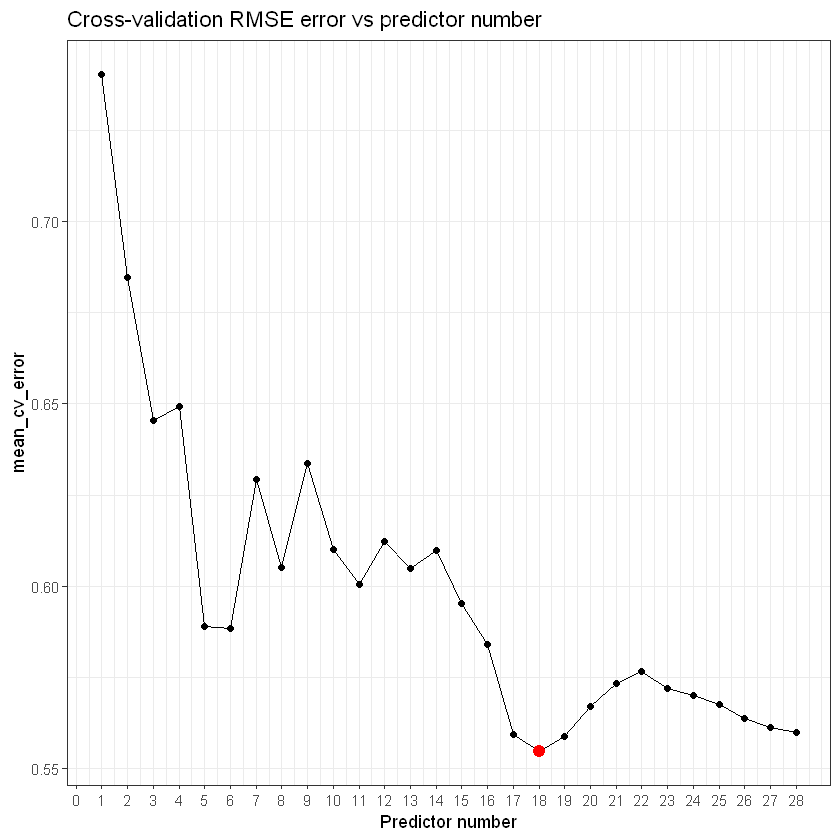

In [15]:
library(caret)
ggplot(data = data.frame(n_predictores = 1:28, mean_cv_error = mean_cv_error),
       aes(x = n_predictores, y = mean_cv_error)) +
  geom_line() +
  geom_point() +
  geom_point(aes(x = n_predictores[which.min(mean_cv_error)],
                 y = mean_cv_error[which.min(mean_cv_error)]),
             colour = "red", size = 3) +
  scale_x_continuous(breaks = c(0:28)) +
  theme_bw() +
  labs(title = "Cross-validation RMSE error vs predictor number",
       x = "Predictor number")

As we can see in the plot, the minimum RMSE is for the model with 18 predictors:

In [16]:
mean_cv_error <- apply(X = error_matrix, MARGIN = 2, FUN = mean)
mean_cv_error[which.min(x = mean_cv_error)[1]]

18 
0.5546918

In [23]:
full_model <- regsubsets(W1.2MedDifWRelFFM1~., data = data_physical, nvmax = 28)

In [18]:
print(paste('The adjusted R squared is:',summary(full_model)$adjr2[18]))

[1] "The adjusted R squared is: 0.675921411810075"


Regarding to the BIC value in the next plot we can see the evolution:

(For being able to display all the predictors names some adjustments were needed [[2]](#stackoverflow))

In [19]:
plot.regsubsets2 <- 
function (x, labels = obj$xnames, main = NULL, scale = c("bic", 
    "Cp", "adjr2", "r2"), col = gray(seq(0, 0.9, length = 10)), 
    ...) 
{
    obj <- x
    lsum <- summary(obj)
    par(mar = c(7, 5, 6, 3) + 0.1)
    nmodels <- length(lsum$rsq)
    np <- obj$np
    propscale <- FALSE
    sscale <- pmatch(scale[1], c("bic", "Cp", "adjr2", "r2"), 
        nomatch = 0)
    if (sscale == 0) 
        stop(paste("Unrecognised scale=", scale))
    if (propscale) 
        stop(paste("Proportional scaling only for probabilities"))
    yscale <- switch(sscale, lsum$bic, lsum$cp, lsum$adjr2, lsum$rsq)
    up <- switch(sscale, -1, -1, 1, 1)
    index <- order(yscale * up)
    colorscale <- switch(sscale, yscale, yscale, -log(pmax(yscale, 
        1e-04)), -log(pmax(yscale, 1e-04)))
    image(z = t(ifelse(lsum$which[index, ], colorscale[index], 
        NA + max(colorscale) * 1.5)), xaxt = "n", yaxt = "n", 
        x = (1:np), y = 1:nmodels, xlab = "", ylab = scale[1], 
        col = col)
    laspar <- par("las")
    on.exit(par(las = laspar))
    par(las = 2)
    axis(1, at = 1:np, labels = labels, ...) # I modified this line
    axis(2, at = 1:nmodels, labels = signif(yscale[index], 2))
    if (!is.null(main)) 
        title(main = main)
    box()
    invisible(NULL)
}

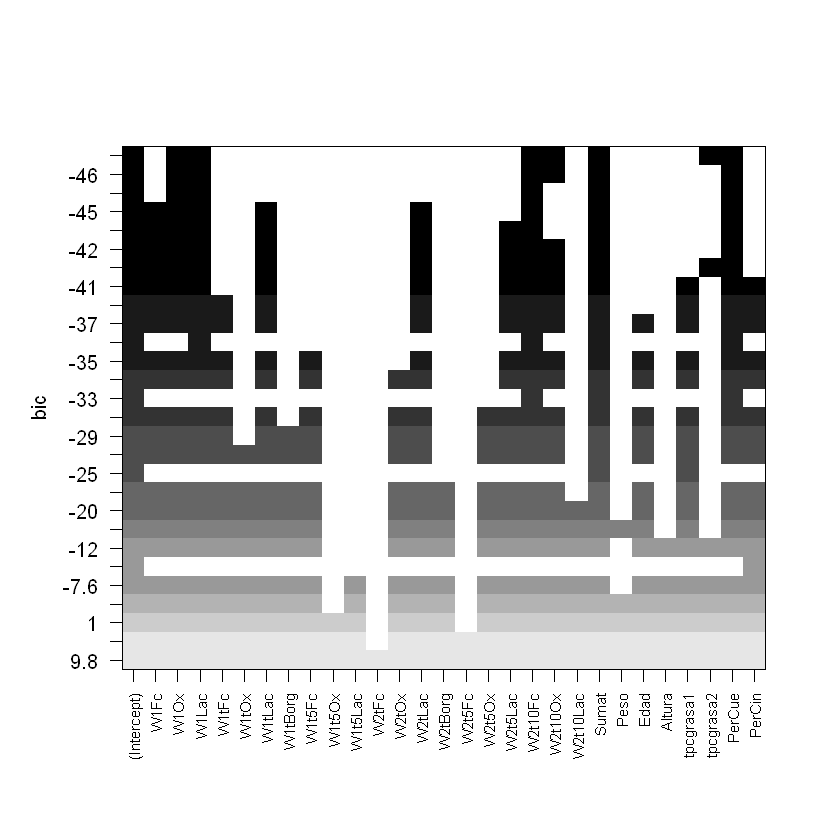

In [20]:
plot.regsubsets2(full_model, cex.axis = 0.75)


This plot shows the importance of the predictors in the model by the color of squares, the darker is the color the more important the predictor.

In [21]:
print(paste('The BIC value is:',summary(full_model)$bic[18]))

[1] "The BIC value is: -29.2751948107374"


The value of the BIC is not bad, but it almost the double that the reached with the test performed without Sumat predictor.

## References <a class="anchor" id="ref"></a>

* [Returning to the index of contents](#index)

[1] James, G., Witten, D., Hastie, T. and Tibshirani, R. (2013) "Linear model selection and regularization", in James, G., Witten, D., Hastie, T., and Tibshirani, R. (eds.) An introduction to statistical learning with applications in R. Springer Science+Business Media, pp. 203–264. doi:https://doi.org/10.1007/978-1-4614-7138-7.<a class="anchor" id="james2013"></a>

[2] Rodrigo, J. A. (2016) Selección de predictores y mejor modelo lineal múltiple: subset selection, ridge regression, lasso regression y dimension reduction. Available at: https://rpubs.com/Joaquin_AR/242707 (Accessed: May 3, 2020).<a class="anchor" id="rodrigo2016"></a>

[2] stackoverflow (2014) Cannot change text size in regsubsets plot. Available at: https://stackoverflow.com/questions/21708764/cannot-change-text-size-in-regsubsets-plot (Accessed: May 3, 2020).<a class="anchor" id="stackoverflow2014"></a>